In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
sns.set_style("whitegrid")

In [2]:
def yhat(x,m,c):
    return (m*x+c)

In [3]:
yhat(x=np.arange(1,11),m=2,c=1)

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21])

# Linear Regression - Gradient Descent

In [4]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([3,5,7,9,11,13,15,17,19,21])

# y = mx+c
## m=2 c=1

In [5]:
yhat(x,1,1)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [6]:
np.mean((y-yhat(x,2,5))**2)

16.0

In [7]:
cost=[]
for i in np.arange(-10,10):
    cost.append(np.mean((y-yhat(x,i,1))**2))

In [8]:
cost

[5544.0,
 4658.5,
 3850.0,
 3118.5,
 2464.0,
 1886.5,
 1386.0,
 962.5,
 616.0,
 346.5,
 154.0,
 38.5,
 0.0,
 38.5,
 154.0,
 346.5,
 616.0,
 962.5,
 1386.0,
 1886.5]

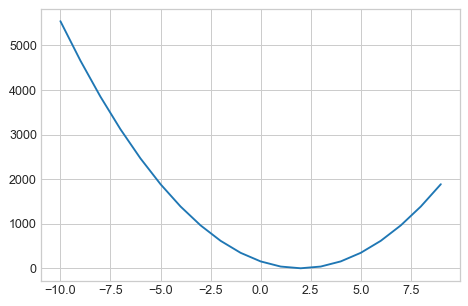

In [9]:
plt.figure(dpi=90)
sns.lineplot(np.arange(-10,10),cost)
plt.show()

In [10]:
def lineargd (x,y,m=0,c=0,niterate=10,lr=0.01):
    
    x=np.array(x)
    y=np.array(y)
    
    for i in np.arange(niterate):
        cf=np.mean((y-yhat(x,m,c))**2)
        dm=-2*np.mean(x*(y-yhat(x,m,c)))
        dc=-2*np.mean((y-yhat(x,m,c)))
        m=round(m-(lr*dm),2)
        c=round(c-(lr*dc),2)
        print(round(cf,2),m,c)
    return(m,c)

In [11]:
lineargd(x,y,niterate=20,lr=0.01)

177.0 1.65 0.24
8.22 2.0 0.29
0.5 2.08 0.3
0.12 2.1 0.31
0.1 2.1 0.31
0.1 2.1 0.31
0.1 2.1 0.31
0.1 2.1 0.31
0.1 2.1 0.31
0.1 2.1 0.31
0.1 2.1 0.31
0.1 2.1 0.31
0.1 2.1 0.31
0.1 2.1 0.31
0.1 2.1 0.31
0.1 2.1 0.31
0.1 2.1 0.31
0.1 2.1 0.31
0.1 2.1 0.31
0.1 2.1 0.31


(2.1, 0.31)

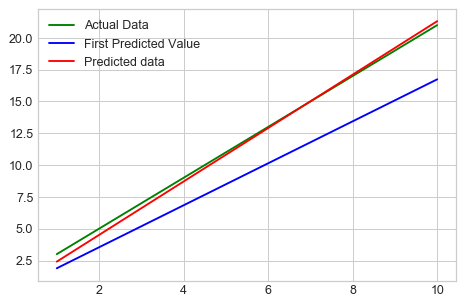

In [12]:
plt.figure(dpi=90)
sns.lineplot(x,y,color="green")
sns.lineplot(x,yhat(x,1.65,0.24),color="blue")
sns.lineplot(x,yhat(x,2.1,0.31),color="red")
plt.legend(["Actual Data","First Predicted Value","Predicted data"])
plt.show()

# Logisitic Regression

In [13]:
def sigmoid(x,m,c):
    return (1/(1+np.exp(-(m*x+c))))

In [14]:
round(sigmoid(100,1,1),2)

1.0

In [15]:
x=np.arange(-10,10)
sigmoid(x,1,1)

array([1.23394576e-04, 3.35350130e-04, 9.11051194e-04, 2.47262316e-03,
       6.69285092e-03, 1.79862100e-02, 4.74258732e-02, 1.19202922e-01,
       2.68941421e-01, 5.00000000e-01, 7.31058579e-01, 8.80797078e-01,
       9.52574127e-01, 9.82013790e-01, 9.93307149e-01, 9.97527377e-01,
       9.99088949e-01, 9.99664650e-01, 9.99876605e-01, 9.99954602e-01])

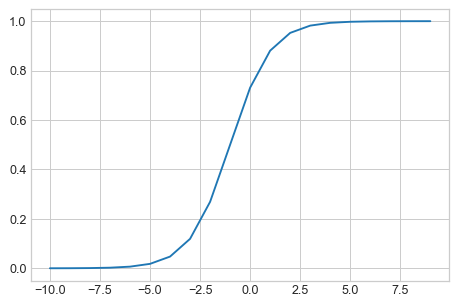

In [16]:
plt.figure(dpi=90)
sns.lineplot(x,sigmoid(x,1,1))
plt.show()

In [17]:
x=np.array([1,2,3,4,5,6,7,8,9,10]) # No of Hours a student Studies
y=np.array([0,0,0,0,0,1,1,1,1,1]) # Pass = 1 Fail = 0

In [18]:
cost=[]
for i in np.arange(-10,10):
    cost.append(np.mean((y-sigmoid(x,i,1))**2))
cost

[0.5000000015226223,
 0.5000000112459712,
 0.5000000830014372,
 0.5000006113870384,
 0.5000044794532432,
 0.5000323518975202,
 0.5002250043530898,
 0.5014254156474423,
 0.5074585712052214,
 0.5318092867798013,
 0.30338806675851815,
 0.462927296348756,
 0.48919551106366194,
 0.4962434272059858,
 0.49864077135204254,
 0.49950272383902056,
 0.4998174195748553,
 0.49993287998360136,
 0.49997531432477144,
 0.4999909195116586]

# Binary Cross Entropy

In [19]:
-np.sum(y*np.log(sigmoid(x,2,1))+(1-y)*np.log(1-sigmoid(x,2,1)))

35.056356884265135

In [20]:
cost=[]
for i in np.arange(-10,10):
    cost.append(-np.sum(y*np.log(sigmoid(x,i,1)+1e-12)+
                        (1-y)*np.log(1-sigmoid(x,i,1)+1e-12)))
cost

[138.1552289874305,
 138.15544102740552,
 138.15601734822116,
 138.15758196285793,
 138.1612057914388,
 137.94502496318222,
 132.4717886338087,
 113.34942336044094,
 75.36941217867138,
 36.210635454511845,
 8.132616875156797,
 20.204288698994457,
 35.056356815012784,
 50.01909982013363,
 65.00549838960276,
 79.82241954025426,
 91.52838350280646,
 100.03186626238457,
 106.18795488255473,
 111.36734593989621]

In [21]:
def logisticgd (x,y,m=0,c=0,niterate=10,lr=0.01):
    
    x=np.array(x)
    y=np.array(y)
    
    for i in np.arange(niterate):
        cf=-np.sum(y*np.log(sigmoid(x,m,c)+1e-12)+
                   (1-y)*np.log(1-sigmoid(x,m,c)+1e-12))
        dm=-1*np.sum(x*(y-sigmoid(x,m,c)))
        dc=-1*np.sum((y-sigmoid(x,m,c)))
        m=round(m-(lr*dm),2)
        c=round(c-(lr*dc),2)
        print(round(cf,2),m,c)
    return(m,c)

In [22]:
logisticgd(x,y,niterate=50,m=0,c=0,lr=0.05)

6.93 0.62 0.0
10.3 -0.03 -0.21
7.49 0.88 -0.16
13.12 0.19 -0.38
5.43 0.23 -0.46
5.3 0.18 -0.55
5.23 0.35 -0.6
5.44 0.06 -0.72
6.41 0.89 -0.67
11.09 0.23 -0.87
4.76 0.4 -0.91
4.99 0.12 -1.03
5.74 0.87 -0.99
9.56 0.24 -1.18
4.53 0.55 -1.2
5.32 0.13 -1.34
5.94 1.04 -1.27
10.66 0.39 -1.47
3.94 0.34 -1.53
3.92 0.47 -1.56
4.0 0.27 -1.65
4.31 0.74 -1.63
5.86 0.24 -1.78
4.74 0.92 -1.73
7.5 0.34 -1.9
3.8 0.67 -1.9
4.5 0.28 -2.02
4.45 0.93 -1.97
6.83 0.38 -2.13
3.56 0.69 -2.13
4.13 0.33 -2.24
4.05 0.9 -2.2
5.81 0.39 -2.34
3.54 0.78 -2.32
4.38 0.37 -2.44
3.78 0.89 -2.4
5.16 0.42 -2.53
3.38 0.8 -2.51
4.11 0.41 -2.62
3.52 0.88 -2.59
4.58 0.44 -2.71
3.31 0.84 -2.68
4.04 0.45 -2.79
3.27 0.86 -2.76
4.02 0.47 -2.87
3.16 0.85 -2.84
3.78 0.48 -2.94
3.12 0.86 -2.91
3.71 0.5 -3.01
3.01 0.85 -2.99


(0.85, -2.99)

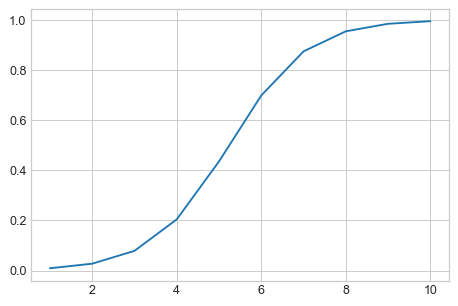

In [23]:
plt.figure(dpi=90)
sns.lineplot(x,sigmoid(x,1.1,-5.76))
plt.show()

In [24]:
print(x)
print(sigmoid(x,1.1,-5.76))

[ 1  2  3  4  5  6  7  8  9 10]
[0.00937769 0.02765242 0.07871034 0.2042403  0.43536371 0.69846522
 0.87435214 0.95434883 0.98432671 0.99472769]


In [25]:
def bhapredict(input):
    if input >0.5:
        return 1
    else:
        return 0

In [26]:
#List comprehension method
[bhapredict(i) for i in sigmoid(x,1.1,-5.76)]

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [27]:
for i in sigmoid(x,1.1,-5.76):
    print(bhapredict(i))

0
0
0
0
0
1
1
1
1
1


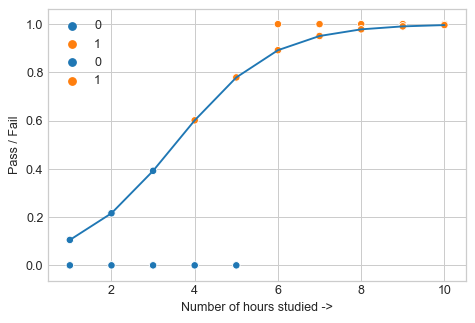

In [28]:
plt.figure(dpi=90)
sns.scatterplot(x,y,hue=y)
sns.lineplot(x,sigmoid(x,0.85, -2.99))
sns.scatterplot(x,sigmoid(x,0.85, -2.99),
                hue=[bhapredict(i) for i in sigmoid(x,0.85, -2.99)])
plt.xlabel("Number of hours studied ->")
plt.ylabel("Pass / Fail")
plt.show()

In [29]:
(3+5)/10

0.8

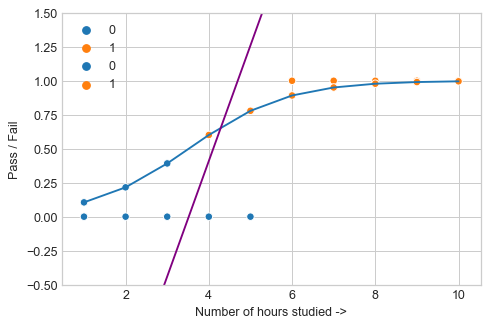

In [34]:
plt.figure(dpi=90)
sns.scatterplot(x,y,hue=y)
sns.lineplot(x,sigmoid(x,0.85, -2.99))
sns.scatterplot(x,sigmoid(x,0.85, -2.99),
                hue=[bhapredict(i) for i in sigmoid(x,0.85, -2.99)])
sns.lineplot(x,yhat(x,0.85,-2.99),color="purple")
plt.xlabel("Number of hours studied ->")
plt.ylabel("Pass / Fail")
plt.ylim([-0.5,1.5])
plt.show()

In [37]:
# Try using a linear regression for classification example
logisticgd(x,y,niterate=100,m=0,c=0,lr=0.01)

6.93 0.12 0.0
6.1 0.14 -0.02
6.04 0.14 -0.04
6.01 0.15 -0.06
5.97 0.15 -0.08
5.94 0.15 -0.1
5.9 0.16 -0.12
5.86 0.16 -0.14
5.83 0.16 -0.16
5.8 0.17 -0.18
5.76 0.17 -0.2
5.73 0.17 -0.22
5.69 0.18 -0.24
5.66 0.18 -0.26
5.62 0.18 -0.28
5.59 0.18 -0.3
5.56 0.19 -0.32
5.52 0.19 -0.34
5.49 0.19 -0.36
5.46 0.2 -0.38
5.42 0.2 -0.4
5.39 0.2 -0.42
5.36 0.21 -0.44
5.33 0.21 -0.46
5.3 0.21 -0.48
5.26 0.21 -0.5
5.24 0.22 -0.51
5.22 0.22 -0.53
5.19 0.22 -0.55
5.16 0.23 -0.56
5.14 0.23 -0.58
5.11 0.23 -0.6
5.08 0.23 -0.61
5.06 0.23 -0.62
5.05 0.24 -0.63
5.03 0.24 -0.65
5.0 0.24 -0.66
4.99 0.24 -0.67
4.97 0.24 -0.68
4.96 0.25 -0.69
4.94 0.25 -0.7
4.93 0.25 -0.71
4.91 0.25 -0.72
4.9 0.25 -0.73
4.88 0.25 -0.74
4.87 0.25 -0.75
4.86 0.26 -0.76
4.84 0.26 -0.77
4.83 0.26 -0.78
4.81 0.26 -0.79
4.8 0.26 -0.8
4.78 0.26 -0.81
4.77 0.27 -0.82
4.75 0.27 -0.83
4.74 0.27 -0.84
4.73 0.27 -0.85
4.71 0.27 -0.86
4.7 0.27 -0.87
4.69 0.28 -0.88
4.67 0.28 -0.89
4.66 0.28 -0.9
4.64 0.28 -0.91
4.63 0.28 -0.92
4.62 0.28 -0.9

(0.34, -1.29)

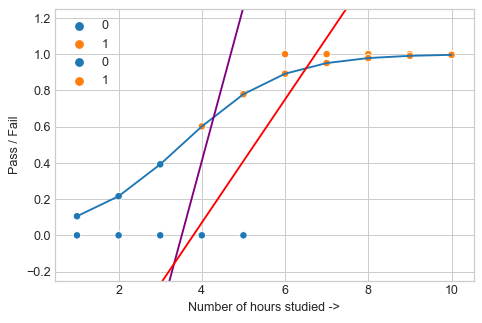

In [40]:
plt.figure(dpi=90)
sns.scatterplot(x,y,hue=y)
sns.lineplot(x,sigmoid(x,0.85, -2.99))
sns.scatterplot(x,sigmoid(x,0.85, -2.99),
                hue=[bhapredict(i) for i in sigmoid(x,0.85, -2.99)])
sns.lineplot(x,yhat(x,0.85,-2.99),color="purple")
sns.lineplot(x,yhat(x,0.34, -1.29),color="red")
plt.xlabel("Number of hours studied ->")
plt.ylabel("Pass / Fail")
plt.ylim([-0.25,1.25])
plt.show()